In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import tensorflow as tf
tf.python.control_flow_ops = tf

import lstm, time #helper libraries
import numpy as np
from sklearn.metrics import mean_squared_error
import math

from pprint import pprint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 12)

Using TensorFlow backend.


In [2]:
#Step 1 Load Data #load_data(filename, seq_len, normalise_window)
look_back = 50
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', look_back, True)

print(X_train)
print(X_test)

[[[  0.00000000e+00]
  [ -2.78592874e-03]
  [ -1.59975802e-02]
  ..., 
  [  4.75881640e-02]
  [  4.93326249e-02]
  [  4.17180746e-02]]

 [[  0.00000000e+00]
  [  1.17356390e-02]
  [ -2.53901446e-02]
  ..., 
  [  2.58104297e-02]
  [  3.72050591e-02]
  [  4.23274591e-02]]

 [[  0.00000000e+00]
  [  6.19733192e-03]
  [  8.70775842e-03]
  ..., 
  [ -3.07825860e-01]
  [ -3.29812328e-01]
  [ -2.57505740e-01]]

 ..., 
 [[  0.00000000e+00]
  [ -8.50636202e-03]
  [ -2.07335398e-02]
  ..., 
  [  5.42561201e-02]
  [  5.02809820e-02]
  [  5.01744726e-02]]

 [[  0.00000000e+00]
  [ -2.54874964e-04]
  [  3.83950600e-03]
  ..., 
  [  3.42328670e-03]
  [  1.03377766e-02]
  [  1.35485977e-02]]

 [[  0.00000000e+00]
  [  9.18009093e-03]
  [  1.54502718e-02]
  ..., 
  [  9.44851047e-03]
  [ -5.02375551e-04]
  [ -1.41166302e-03]]]
[[[  0.00000000e+00]
  [  5.14346191e-06]
  [  1.11707103e-02]
  ..., 
  [  5.86539766e-02]
  [  5.84022033e-02]
  [  4.10963023e-02]]

 [[  0.00000000e+00]
  [  1.11655094e-02]

In [3]:
#Step 2 Build Model
batch_size = 1
epochs=1
model = Sequential()

model.add(LSTM(50,batch_input_shape=(batch_size, look_back, 1),return_sequences=True))#, dropout_W=0.2))
model.add(Dropout(0.2))

model.add(LSTM(100,return_sequences=False)) #, dropout_W=0.2))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print 'compilation time : ', time.time() - start

compilation time :  0.514616966248


In [4]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    nb_epoch=epochs,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 244s - loss: 5.7764e-04 - val_loss: 2.4231e-04

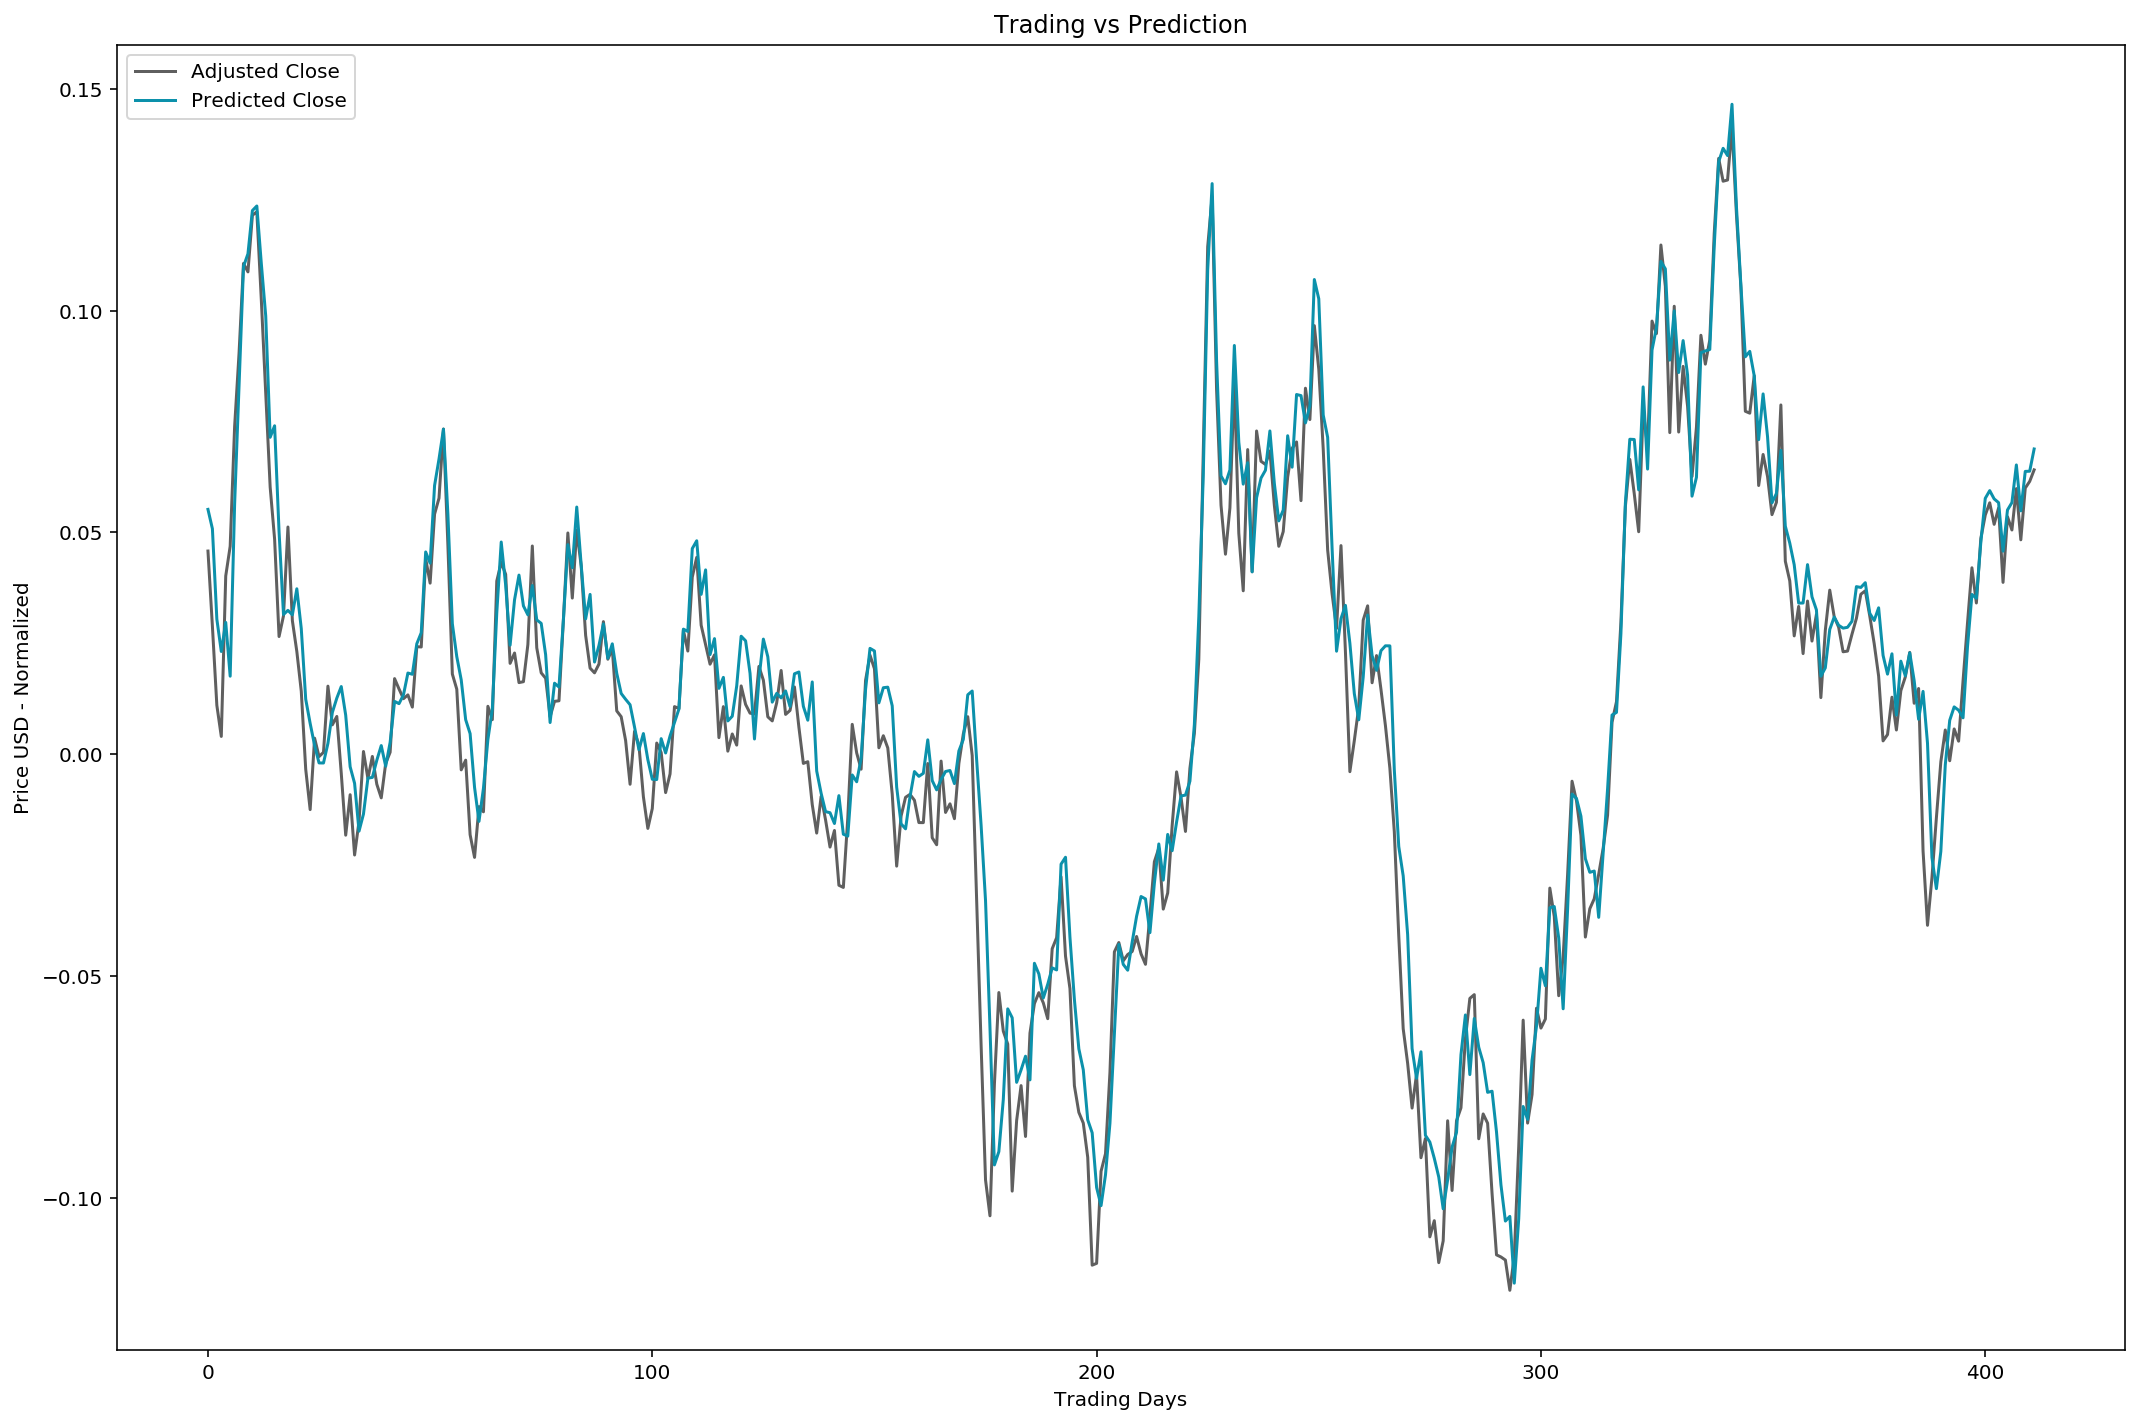

In [5]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, batch_size, batch_size)
#lstm.plot_results_multiple(predictions, y_test, batch_size)


# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)

# Add labels
plt.ylabel('Price USD - Normalized')
plt.xlabel('Trading Days')
# Plot actual and predicted close values

plt.plot(y_test,'#5F5F5F', label='Adjusted Close')
plt.plot(predictions, '#0C91AB', label='Predicted Close')

# Set title
ax.set_title('Trading vs Prediction')
ax.legend(loc='upper left')

plt.show()

In [6]:
preds = np.array(predictions).flatten()
#print(preds)
# The mean squared error
testScore = mean_squared_error(y_test, preds)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

Test Score: 0.0001 MSE (0.0122 RMSE)


No Dropout: Test Score: 0.0003 MSE (0.0173 RMSE)

Dropout 20%: Test Score: 0.0002 MSE (0.0124 RMSE)